In [2]:
## Veri kümesini küçük parçalara bölüp her veride farklı karar ağaçları oluşturmak sınıflandırmada coğunluk kararı tahmınde ortalama değer alınır.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

Veri Okuma

In [2]:
dataFrame = pd.read_csv('maaslar.csv')
dataFrame.head() ## Verilere genel bakış(kolonları sütünları görmek için)

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500


Veriyi Anlamak

In [3]:
dataFrame.describe() ## Verinin istatistikleri

,Egitim Seviyesi,maas
count,10.00000,10.000000
mean,5.50000,12475.000000
std,3.02765,14968.694183
min,1.00000,2250.000000
25%,3.25000,3250.000000
50%,5.50000,6500.000000
75%,7.75000,13750.000000
max,10.00000,50000.000000


In [4]:
dataFrame.isnull().sum() ## Null verilerin kontrolü

unvan              0
Egitim Seviyesi    0
maas               0
dtype: int64

<AxesSubplot:xlabel='Egitim Seviyesi', ylabel='maas'>

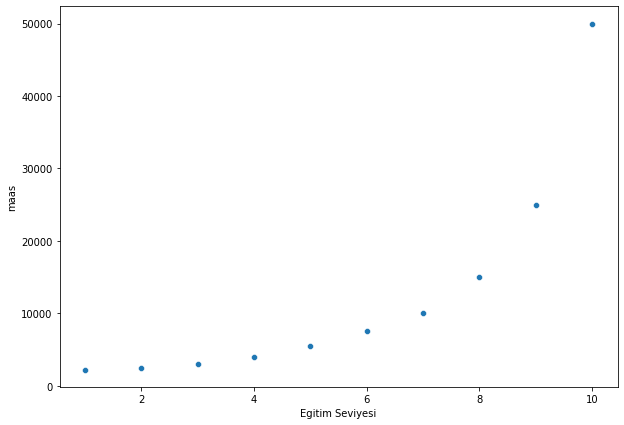

In [5]:
plt.figure(figsize=(10,7)) ## exponansiyel(üstsel) artış
sbn.scatterplot(x='Egitim Seviyesi',y='maas',data=dataFrame) ## Noktasal grafik

Model Oluşturma

In [6]:
y = dataFrame.iloc[:,2:3].values ## Maas
x = dataFrame.iloc[:,1:2].values ## Egitim seviyesi

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
rf_reg = RandomForestRegressor(n_estimators=10,random_state=0)
rf_reg.fit(x,y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [9]:
guess = rf_reg.predict(x) ## x_scale rgöre tahmin
guess ## Tahmin verisi

array([ 2300.,  2450.,  2950.,  3700.,  5050.,  6800., 10500., 15250.,
       23500., 42500.])

R2 değeri: Algoritmanın başarı oranı denebilir.0 en kötü 1 en iyi

In [10]:
from sklearn.metrics import r2_score

In [11]:
r2_score(y,guess)

0.9704434230386582

In [12]:
Z = x + 0.5
K = x - 0.4

In [13]:
guess1 = rf_reg.predict(Z) ## x_scale rgöre tahmin
guess ## Tahmin verisii

array([ 2300.,  2450.,  2950.,  3700.,  5050.,  6800., 10500., 15250.,
       23500., 42500.])

R2 değeri:

In [15]:
r2_score(y,guess1)

0.8820523231127324

In [16]:
guess2 = rf_reg.predict(K) ## x_scale rgöre tahmin
guess ## Tahmin verisi

array([ 2300.,  2450.,  2950.,  3700.,  5050.,  6800., 10500., 15250.,
       23500., 42500.])

R2 değeri:

In [18]:
r2_score(y,guess2)

0.9704434230386582

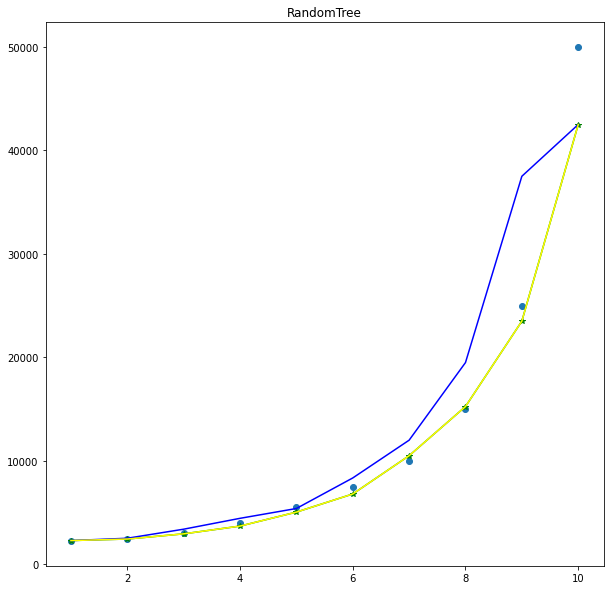

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.title('RandomTree')
plt.plot(x,guess,'g-*')
plt.plot(x,guess1,'blue')
plt.plot(x,guess2,'yellow')

In [20]:
rf_reg.predict([[8.6]])

array([23500.])

In [21]:
rf_reg.predict([[9.5]])

array([37500.])

In [22]:
## DecisionTree gibi kalıplandırma yapmaz ortalama değerler verebilir.